# Backpropagation for multi-layer networks
This exercise implements the backpropagation example in chapter 3, *Sigmoid Neurons and Backpropagation*. The figure shows a simple two-layer feed-forward neural network used to explain backpropagation. 

![](doc/neurons.png)



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [2]:
# Weights for layer G
w_xg0 = 0.3
w_xg1 = 0.6
w_xg2 = -0.1
w_xg = np.array([w_xg0, w_xg1, w_xg2])

# Weights for layer F
w_gf0 = -0.2
w_gf1 = 0.5
w_gf = np.array([w_gf0, w_gf1])

# Inputs
x1 = -0.9
x2 = 0.1
x_xg = np.array([1.0, x1, x2]) # First element is 1 for bias. 

# True y
y_true = 1.0

# Learning rate
learning_rate = 0.5 # Experiment with the learning rate

# Epochs
num_epochs = 500

# Allocate space for the mean squared error
mse = np.zeros(num_epochs)

# Print update
print("Starting weights: ")
print("w_xg = " + str(w_xg) + ", w_gf = " + str(w_gf))
print()
for k in range(num_epochs):
    
    print("After epoch %d" % k)
    
    ### Forward pass ###
    
    # Output of neuron G
    z_g = np.dot(x_xg, w_xg)
    y_g = np.tanh(z_g) # Save this for backprop
    
    # Output of neuron F
    x_gf = np.array([1.0, y_g])
    z_f = np.dot(x_gf, w_gf)
    y_f = sigmoid(z_f) # Save this for backprop
    
    # Calculate error
    MSE = 0.5 * np.power(y_f - y_true, 2) # Save this for backprop
    mse[k] = MSE
    print("y_true = %0.2f, y_pred = %0.2f (MSE = %0.2e)" % (y_true, y_f, MSE))
    print("Neuron G output y_g = %0.2f" % y_g)
    print("Neuron F output y_f = %0.2f" % y_f)
    
    
    ### Backward pass ###
    
    ## Backpropagate the errors to get the gradients
    
    #  Derivative of the error function
    dE_df = y_f - y_true # d(network error)) / d(output of neuron F)
    print("MSE' = %0.2e" % dE_df)
    
    # Error for neuron F
    df_dzf = y_f * (1.0 - y_f) # Derivative of the output -- S'(z_f) = d/d(z_f){S(z_f)} = S(z_f) * (1 - S(z_f))
    err_F = dE_df * df_dzf
    print("Error term F = %0.3f" % err_F)
    
    # Error for neuron G
    dzf_dg = w_gf1
    dg_dzg = 1 - np.power(y_g, 2) # Derivative of the output of G: y_g = tanh(z_g); dy_g/dz_g = 1 - tanh^2(z_g) = 1 - y_g^2
    err_G = err_F * dzf_dg * dg_dzg
    print("Error term G = %0.4f" % err_G)
    
    
    ## Update the weights using the gradients
    
    # Calculate weight adjustments
    delta_w_xg = -1 * learning_rate * x_xg * err_G 
    delta_w_gf = -1 * learning_rate * x_gf * err_F 
    print("Delta w_xg = " + str(delta_w_xg))
    print("Delta w_gf = " + str(delta_w_gf))

    # Update the weights
    w_xg += delta_w_xg
    w_gf += delta_w_gf
    
    # Print update
    print("updated w_xg = " + str(w_xg))
    print("updated w_gf = " + str(w_gf))
    
    print("EOL\n")



Starting weights: 
w_xg = [ 0.3  0.6 -0.1], w_gf = [-0.2  0.5]

After epoch 0
y_true = 1.00, y_pred = 0.42 (MSE = 1.68e-01)
Neuron G output y_g = -0.24
Neuron F output y_f = 0.42
MSE' = -5.80e-01
Error term F = -0.141
Error term G = -0.0664
Delta w_xg = [ 0.03320049 -0.02988044  0.00332005]
Delta w_gf = [ 0.07063823 -0.01730062]
updated w_xg = [ 0.33320049  0.57011956 -0.09667995]
updated w_gf = [-0.12936177  0.48269938]
EOL

After epoch 1
y_true = 1.00, y_pred = 0.45 (MSE = 1.54e-01)
Neuron G output y_g = -0.19
Neuron F output y_f = 0.45
MSE' = -5.55e-01
Error term F = -0.137
Error term G = -0.0661
Delta w_xg = [ 0.03305291 -0.02974762  0.00330529]
Delta w_gf = [ 0.06851017 -0.01283444]
updated w_xg = [ 0.3662534   0.54037194 -0.09337466]
updated w_gf = [-0.0608516   0.46986494]
EOL

After epoch 2
y_true = 1.00, y_pred = 0.47 (MSE = 1.41e-01)
Neuron G output y_g = -0.13
Neuron F output y_f = 0.47
MSE' = -5.30e-01
Error term F = -0.132
Error term G = -0.0649
Delta w_xg = [ 0.03247473 -

Delta w_xg = [ 6.75350007e-04 -6.07815006e-04  6.75350007e-05]
Delta w_gf = [0.00309162 0.00231997]
updated w_xg = [ 0.97313853 -0.00582468 -0.03268615]
updated w_gf = [1.55615509 1.15028097]
EOL

After epoch 123
y_true = 1.00, y_pred = 0.92 (MSE = 3.33e-03)
Neuron G output y_g = 0.75
Neuron F output y_f = 0.92
MSE' = -8.17e-02
Error term F = -0.006
Error term G = -0.0013
Delta w_xg = [ 6.67690584e-04 -6.00921526e-04  6.67690584e-05]
Delta w_gf = [0.0030622  0.00229953]
updated w_xg = [ 0.97380622 -0.0064256  -0.03261938]
updated w_gf = [1.55921729 1.1525805 ]
EOL

After epoch 124
y_true = 1.00, y_pred = 0.92 (MSE = 3.30e-03)
Neuron G output y_g = 0.75
Neuron F output y_f = 0.92
MSE' = -8.13e-02
Error term F = -0.006
Error term G = -0.0013
Delta w_xg = [ 6.60185033e-04 -5.94166529e-04  6.60185033e-05]
Delta w_gf = [0.00303331 0.00227945]
updated w_xg = [ 0.97446641 -0.00701977 -0.03255336]
updated w_gf = [1.5622506  1.15485995]
EOL

After epoch 125
y_true = 1.00, y_pred = 0.92 (MSE = 3

Delta w_xg = [ 2.60235675e-04 -2.34212107e-04  2.60235675e-05]
Delta w_gf = [0.00137591 0.0010849 ]
updated w_xg = [ 1.02413014 -0.05171712 -0.02758699]
updated w_gf = [1.80725952 1.34376861]
EOL

After epoch 248
y_true = 1.00, y_pred = 0.95 (MSE = 1.45e-03)
Neuron G output y_g = 0.79
Neuron F output y_f = 0.95
MSE' = -5.38e-02
Error term F = -0.003
Error term G = -0.0005
Delta w_xg = [ 2.58862269e-04 -2.32976042e-04  2.58862269e-05]
Delta w_gf = [0.00136967 0.00108023]
updated w_xg = [ 1.024389  -0.0519501 -0.0275611]
updated w_gf = [1.80862919 1.34484884]
EOL

After epoch 249
y_true = 1.00, y_pred = 0.95 (MSE = 1.44e-03)
Neuron G output y_g = 0.79
Neuron F output y_f = 0.95
MSE' = -5.37e-02
Error term F = -0.003
Error term G = -0.0005
Delta w_xg = [ 2.57502046e-04 -2.31751841e-04  2.57502046e-05]
Delta w_gf = [0.00136349 0.00107559]
updated w_xg = [ 1.0246465  -0.05218185 -0.02753535]
updated w_gf = [1.80999268 1.34592443]
EOL

After epoch 250
y_true = 1.00, y_pred = 0.95 (MSE = 1.43

Error term G = -0.0003
Delta w_xg = [ 1.53500612e-04 -1.38150551e-04  1.53500612e-05]
Delta w_gf = [0.00087222 0.00070214]
updated w_xg = [ 1.04886675 -0.07398008 -0.02511332]
updated w_gf = [1.94289819 1.45187481]
EOL

After epoch 373
y_true = 1.00, y_pred = 0.96 (MSE = 9.08e-04)
Neuron G output y_g = 0.81
Neuron F output y_f = 0.96
MSE' = -4.26e-02
Error term F = -0.002
Error term G = -0.0003
Delta w_xg = [ 1.52978377e-04 -1.37680540e-04  1.52978377e-05]
Delta w_gf = [0.00086965 0.00070015]
updated w_xg = [ 1.04901973 -0.07411776 -0.02509803]
updated w_gf = [1.94376784 1.45257497]
EOL

After epoch 374
y_true = 1.00, y_pred = 0.96 (MSE = 9.06e-04)
Neuron G output y_g = 0.81
Neuron F output y_f = 0.96
MSE' = -4.26e-02
Error term F = -0.002
Error term G = -0.0003
Delta w_xg = [ 1.52459408e-04 -1.37213467e-04  1.52459408e-05]
Delta w_gf = [0.00086709 0.00069817]
updated w_xg = [ 1.04917219 -0.07425497 -0.02508278]
updated w_gf = [1.94463493 1.45327314]
EOL

After epoch 375
y_true = 1.00,

Error term G = -0.0002
Delta w_xg = [ 1.06641516e-04 -9.59773648e-05  1.06641516e-05]
Delta w_gf = [0.00063515 0.00051764]
updated w_xg = [ 1.06477494 -0.08829745 -0.02352251]
updated w_gf = [2.03546546 1.52686463]
EOL

After epoch 498
y_true = 1.00, y_pred = 0.96 (MSE = 6.58e-04)
Neuron G output y_g = 0.82
Neuron F output y_f = 0.96
MSE' = -3.63e-02
Error term F = -0.001
Error term G = -0.0002
Delta w_xg = [ 1.06374874e-04 -9.57373864e-05  1.06374874e-05]
Delta w_gf = [0.00063376 0.00051655]
updated w_xg = [ 1.06488132 -0.08839319 -0.02351187]
updated w_gf = [2.03609922 1.52738118]
EOL

After epoch 499
y_true = 1.00, y_pred = 0.96 (MSE = 6.56e-04)
Neuron G output y_g = 0.82
Neuron F output y_f = 0.96
MSE' = -3.62e-02
Error term F = -0.001
Error term G = -0.0002
Delta w_xg = [ 1.06109464e-04 -9.54985173e-05  1.06109464e-05]
Delta w_gf = [0.00063238 0.00051546]
updated w_xg = [ 1.06498743 -0.08848868 -0.02350126]
updated w_gf = [2.0367316  1.52789664]
EOL



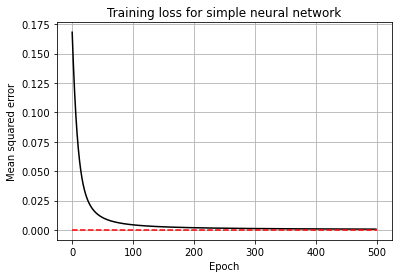

In [3]:
plt.plot(mse, '-k')
plt.plot(np.array([0, num_epochs]), np.array([0,0]), '--r')
plt.xlabel("Epoch")
plt.ylabel("Mean squared error")
plt.title("Training loss for simple neural network")
plt.grid(which="major")
plt.show()